# Effect of the poles on the time response of first and second order systems
<br> In this demo we will look what the effect is of the position of the poles on the zeros/poles plot, the step response,the impulse response, the settling time and the rise time.
<br> The rise time is the time when the step response crosses 90% of the value of the steady state error for <br> the <b>first time</b>. The settling time is the time when the step response starts oscillating in a band of
<br> 2% of the steady state error.
<br> You are able to choose if you want to see a first order system (general form $=\large{\frac{k}{s-a}}$)
<br> or a second order system (general form = $\large{\frac{k}{(s-a)(s-b)}}$).

In [10]:
%matplotlib inline
from control import*
from matplotlib import*
from pylab import*
from math import*
from numpy import*
from IPython.html.widgets import*
from cmath import*
from IPython.display import display

In [11]:

def calculate_steady_state(TF):
    poles=pole(TF)
    for i in range(0,len(poles)):
        if real(poles[i])>=0:
            return None
    t,y=step_response(TF)
    return y[len(y)-1]

def calculate_rise_time(y,t,steady_state):
    # Calculate time to reach the steady state for the first time
    if steady_state==None:
        return "not defined"
    for i in range(1,len(y)):
        if y[i-1]<steady_state*0.9 and y[i]>=steady_state*0.9:
            return t[i]
    return "not defined"
def calculate_settling_time(y,t,steady_state):
    # Calculate the settling time
    if steady_state==None:
        return "not defined"
    if y[-1]> (steady_state +0.02*steady_state) or y[-1] < (steady_state - 0.02*steady_state):
        return "not defined"
    else:
        for i in range(len(y)-1,-1,-1):
            if y[i]> (steady_state + 0.02*steady_state) or y[i] < (steady_state - 0.02*steady_state):
                index = i + 1
                break
        
        return t[i+1]


def first_order_system_time_response(k,a):
    """Plots the zero/pole plot, the step response and the impulse response of a first order system."""
    
    TF = TransferFunction([k,],[1,-a])
    print "H(s)= "
    print "           "
    print TF
    t,y=step_response(TF)
    sse= calculate_steady_state(TF)
    print "Rise time: ",calculate_rise_time(y,t,sse)
    print "Settling time: ",calculate_settling_time(y,t,sse)
    
    
    subplot(1,2,1)
    plot(t,y,label='Step Response')
    title('Step Response')
    xlabel('Time(sec)')
    ylabel('Magnitude')
    
    subplot(1,2,2)
    t,y=impulse_response(TF)
    plot(t,y,label='Impulse Response')
    title('Impulse Response')
    xlabel('Time(sec)')
    ylabel('Magnitude')

    fig= gcf()
    fig.set_size_inches(12,4)
    show ()
    
    matlab.pzmap(TF)
    fig= gcf()
    fig.set_size_inches(5,3)
    show ()
    
def second_order_system_time_response(k,a,b,im):
    """Plots the zero/pole plot, the step response and the impulse response of a second order system."""
    if a!=b and im !=0:
        print """A real system can't have complex poles that are not each other's conjugates!!!"""
    else:
        TF = TransferFunction([k,],[1,-real(((a+im*1j)+(b-im*1j))),real(a*b-(im*1j)**2)])
        print "H(s)= "
        print "           "
        print TF
        t,y=step_response(TF)
        sse= calculate_steady_state(TF)
        print "Rise time: ",calculate_rise_time(y,t,sse)
        print "Settling time: ",calculate_settling_time(y,t,sse)
        
        subplot(1,2,1)
        t,y=step_response(TF)
        plot(t,y,label='Step Response')
        title('Step Response')
        xlabel('Time(sec)')
        ylabel('Magnitude')
        
        subplot(1,2,2)
        t,y=impulse_response(TF)
        plot(t,y,label='Impulse Response')
        title('Impulse Response')
        xlabel('Time(sec)')
        ylabel('Magnitude')
        
        fig= gcf()
        fig.set_size_inches(12,4)
        show ()
    
        matlab.pzmap(TF)
        fig= gcf()
        fig.set_size_inches(5,3)
        show ()
        

    

H(s)= 
           

1.001
-----
s - 8

Rise time:  not defined
Settling time:  not defined


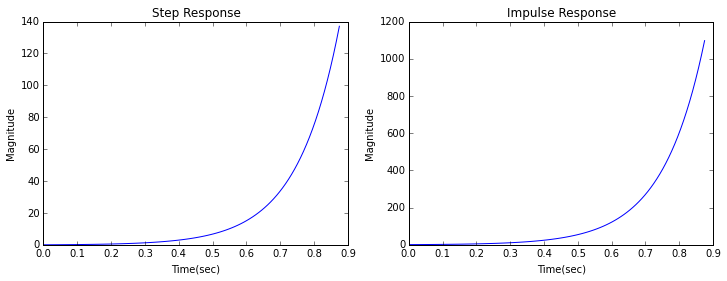

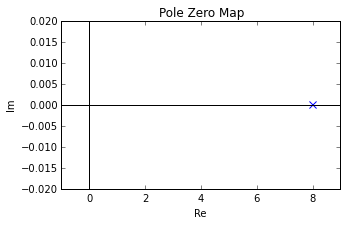

In [12]:

order1=False
order2=False
#1e while loop to see if you want to look at a first order system
keep_going = None
    # Blijf prompten tot correcte input
while keep_going != "Y" and keep_going != "y" and keep_going != "n" and keep_going !="N":
    print "                                                                      "
    print "Do you wanna look at first order systems?"
    
    keep_going = raw_input("(Y/N)? ")
    order1 = True
    if keep_going == "N" or keep_going=="n":
        order1=False
keep_going = None
    # Blijf prompten tot correcte input
#2e while loop to see if you want to look at a second order system    
while keep_going != "Y" and keep_going != "y" and keep_going != "n" and keep_going !="N" and order1==False:
    print "                                                                      "
    print "Do you wanna look at second order systems?"
   
    keep_going = raw_input("(Y/N)? ")
    order2 = True
    if keep_going == "N" or keep_going=="n":
        order2=False
if order1==True:
    interact(first_order_system_time_response,k=(0.001,100,1),a=(-100,100,1))
    
if order2==True:
    interact(second_order_system_time_response,k=(0.001,100,1),a=(-50,50,1),b=(-50,50,1),im=(-50,50,1))